In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
os.chdir('/content/drive/MyDrive/100knock-data_analytics/1章')

In [4]:
#knock1
customer_master = pd.read_csv("customer_master.csv")
customer_master.head()
item_master = pd.read_csv("item_master.csv")
item_master.head()
transaction_1 = pd.read_csv("transaction_1.csv")
transaction_1.head()
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [8]:
#knock2
transaction_2 = pd.read_csv("transaction_2.csv")
transaction = pd.concat([transaction_1,transaction_2],ignore_index=True)
transaction.head()

print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)
transaction_detail.head()

5000
1786
6786


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [10]:
#knock3
join_data = pd.merge(transaction_detail,transaction[["transaction_id","payment_date","customer_id"]], on="transaction_id", how="left")
join_data.head()

print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


In [12]:
#knock4
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [13]:
#knock5
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["price","quantity","item_price"]].head()

,price,quantity,item_price
0,210000,1,210000
1,50000,1,50000
2,120000,1,120000
3,210000,1,210000
4,170000,2,85000


In [15]:
#knock6
print(join_data["price"].sum())
print(transaction["price"].sum())
print(join_data["price"].sum() == transaction["price"].sum())

971135000
971135000
True


In [18]:
#knock7
join_data.isnull().sum()

,0
detail_id,0
transaction_id,0
item_id,0
quantity,0
payment_date,0
customer_id,0
customer_name,0
registration_date,0
customer_name_kana,0
email,0


In [19]:
#knock7
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [20]:
#knock7
#データの期間を確認
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


In [28]:
#konck8
join_data.dtypes

join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date","payment_month"]].head()

join_data.groupby("payment_month")[["price"]].sum()

,price
payment_month,
201902,160185000
201903,160370000
201904,160510000
201905,155420000
201906,164030000
201907,170620000


In [31]:
#knock9
join_data.groupby(["payment_month","item_name"])[["price","quantity"]].sum()

pd.pivot_table(join_data,index="item_name", columns="payment_month", values=["price","quantity"], aggfunc="sum")

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

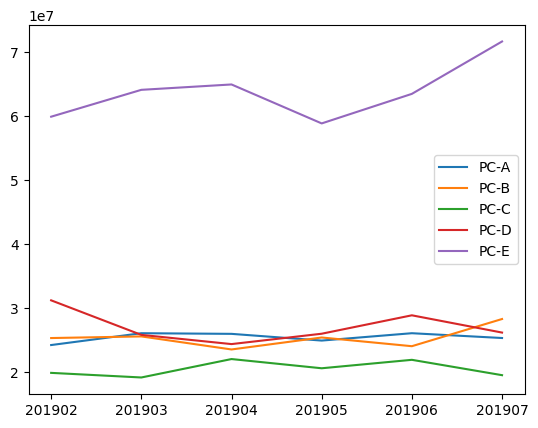

In [40]:
#knock10
import matplotlib.pyplot as plt
#%matplotlib.inline
graph_data = pd.pivot_table(join_data, index="payment_month",columns="item_name", values="price", aggfunc="sum")
graph_data.head()
plt.plot(list(graph_data.index), graph_data["PC-A"], label="PC-A")
plt.plot(list(graph_data.index), graph_data["PC-B"], label="PC-B")
plt.plot(list(graph_data.index), graph_data["PC-C"], label="PC-C")
plt.plot(list(graph_data.index), graph_data["PC-D"], label="PC-D")
plt.plot(list(graph_data.index), graph_data["PC-E"], label="PC-E")
plt.legend()